<a href="https://colab.research.google.com/github/Caroline-Camargo/RelatoriosPython-CalculoNumericoComputacional/blob/main/Relatorio3_CarolineSouzaCamargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 3 Caroline Souza Camargo

#MÉTODOS

In [ ]:
# Bibliotecas
import math
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [ ]:
def lagrange(m, x, y, z):
  Pz = 0
  for i in range(0, m):
    c = 1
    d = 1

    for j in range(0, m):
      if i != j:
        c = c * (z - x[j])
        d = d * (x[i] - x[j])

    Pz = Pz + y[i] * (c/d)

  return Pz

In [ ]:
def newton(m, x, y, z):
  Dely = []
  for i in range(0, m):
    Dely.append(y[i])

  for i in range(0, m - 1):
    for k in range(m - 1, i, -1):
      Dely[k] = (Dely[k] - Dely[k - 1]) / (x[k] - x[k - i -1])

  Pz = Dely[m - 1]

  for i in range(m - 2, -1, -1):
    Pz = Pz * (z - x[i]) + Dely[i]

  return Pz

In [ ]:
def splineNatural(n, x, y):
  if n < 3:
    Info = -1
    return False

  Info = 0
  m = n - 2
  Ha = x[1] - x[0]
  Deltaa = (y[1] - y[0]) / Ha

  e = []
  d = []
  s2 = []
  for i in range(n):
    s2.append(0)
    if i < m:
      e.append(0)
      d.append(0)

  for i in range(0, m):
    ip1 = i + 1
    ip2 = i + 2
    Hb = x[ip2] - x[ip1]
    Deltab = (y[ip2] - y[ip1]) / Hb

    e[i] = Hb
    d[i] = 2 * (Ha + Hb)
    s2[ip1] = 6 * (Deltab - Deltaa)
    Ha = Hb
    Deltaa = Deltab

  m = [[0] * (n-2) for _ in range(n-2)]

  for i in range(n-2):
      m[i][i] = d[i]
      if i < n-3:
          m[i][i+1] = e[i]
          m[i+1][i] = e[i]

  m = np.array(m, dtype=float)
  s2 = np.array(s2, dtype=float)

  s2 = s2[1:-1]
  s2 = np.linalg.solve(m, s2)
  s2 = np.concatenate(([0], s2, [0]))

  eq = []
  for i in range(1, n):
    b = ((y[i] - y[i - 1]) / (x[i] - x[i - 1])) + ((2*(x[i] - x[i - 1]) *s2[i] +  s2[i - 1] * (x[i] - x[i - 1])) / 6)
    d = ((s2[i] - s2[i - 1]) / (6 * (x[i] - x[i - 1])))
    eq.append(f'{y[i - 1]} + {b:.3f} * (x - {x[i - 1]}) + {s2[i] / 2:.3f} * (x - {x[i - 1]})**2 + {d:.3f} * (x - {x[i - 1]})**3')

  print(f"Equações Spline:")
  for i in range(len(eq)):
      print(f"S{i+1} = {eq[i]}")

  return eq

In [ ]:
def mmq(x, y, n, num, tipoAproximacao):
  sumx = 0
  sumxy = 0
  sumy = 0
  sumx2 = 0

  sumlogx = 0
  sumlogxy = 0
  sumlogy = 0
  sumlogx2 = 0

  sumx3 = 0
  sumx4 = 0
  sumx2y = 0
  st = 0
  sr = 0

  for i in range(0, n):
    if tipoAproximacao == 'linear' or tipoAproximacao == 'parabola':
      sumx = sumx + x[i]
      sumy = sumy + y[i]
      sumxy = sumxy + x[i] * y[i]
      sumx2 = sumx2 + x[i] * x[i]

    if tipoAproximacao == 'parabola':
      sumx3 = sumx3 + x[i] ** 3
      sumx4 = sumx4 + x[i] ** 4
      sumx2y = sumx2y + x[i] ** 2 * y[i]

    if tipoAproximacao == 'potencia':
      if x[i] == 0 or y[i] == 0:
        print("ERRO! Não foi possível continuar\nO logaritmo de zero é indefinido.")
        return "Indefinido"
      sumlogx = sumlogx + np.log(x[i])
      sumlogy = sumlogy + np.log(y[i])
      sumlogxy = sumlogxy + np.log(x[i]) * np.log(y[i])
      sumlogx2 = sumlogx2 + np.log(x[i]) * np.log(x[i])

  xm = sumx / n
  ym = sumy / n

  if tipoAproximacao == 'linear': #y = ax + b
    a1 = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx * sumx)
    a0 = ym - a1 * xm
    y_aproximado = a1 * num + a0

  elif tipoAproximacao == 'parabola': #y = ax^2 +bx + c
    A = np.array([[n, sumx, sumx2],
                  [sumx, sumx2, sumx3],
                  [sumx2, sumx3, sumx4]])
    B = np.array([sumy, sumxy, sumx2y])

    coeficientes = np.linalg.solve(A, B)
    c, b, a = coeficientes[0], coeficientes[1], coeficientes[2]
    y_aproximado = a * num ** 2 + b * num + c

  elif tipoAproximacao == 'potencia': #y = bx^a   ->  log(y) = log(b) + a log(x)
    xm = sumlogx / n
    ym = sumlogy / n
    b = (n * sumlogxy - sumlogx * sumlogy) / (n * sumlogx2 - sumlogx * sumlogx)
    a = np.exp(ym - b * xm)
    y_aproximado = a * pow(num, b)

  for i in range(0, n):
    st = st + pow(y[i] - ym, 2)
    sr = sr + pow(y[i] - y_aproximado, 2)
  sxy = pow(sr / (n - 2), 0.5)
  r2 = (st - sr) / st

  if tipoAproximacao == 'linear':
    print(f"Ajuste linear: y = {a1:.2f}x + {a0:.2f}")
    func = lambda x: a1 * x + a0
  elif tipoAproximacao == 'parabola':
    print(f"Ajuste de parábola: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")
    func = lambda x: a * x**2 + b * x + c
  elif tipoAproximacao == 'potencia':
    print(f"Ajuste de potência: y = {a:.2f} * x^{b:.2f}")
    func = lambda x: a * x ** b

  #Gráfico
  plt.scatter(x, y, label='ponto', color = 'black')
  x1 = np.linspace(min(x) - 2, max(x) + 2, 100)
  if tipoAproximacao == 'potencia':
    x1 = np.linspace(min(x), max(x) + 2, 100)
  y1 = [func(x2) for x2 in x1]
  plt.plot(x1, y1, label='reta')
  plt.scatter(num, y_aproximado, label=f'x={num}', color='red', marker='o')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(tipoAproximacao)
  plt.legend()
  plt.grid(True)
  plt.show()

  return y_aproximado

#QUESTÕES


##QUESTÃO 1

**Os dados a seguir para a densidade do gás nitrogênio versus a temperatura são provenientes de uma tabela que foi medida com alta precisão. Use polinômios de primeiro a quinto graus para fazer uma estimativa da densidade em uma temperatura de 330 K. Qual é sua melhor estimativa?**

\begin{array}{c|cccccc}
    T,K & 200 & 250 & 300 & 350 & 400 & 450 \\
    \hline
    Densidade, kg/m^3 & 1.708 & 1.367 & 1.139 & 0.967 & 0.854 & 0.759 \\
\end{array}


###Resposta

O primeiro passo para elaboração do exercício consistiu em obter as estimativas para cada grau de polinômio, considerando temperatura de 330 K. Vale ressaltar, que as escolhas do intervalo levou em consideração que a faixa de valores selecionados precisam conter a estimativa de 330K. Posteriormente elaborei uma tabela comparativa para ficar mais fácil a visualização. O método utilizado para a estimativa foi o de Newton

In [ ]:
def questao01(temperatura):
  table = [["Grau polinomio", "Estimativa"]]

  n = 2
  x = np.array([300.0, 350.0])
  y = np.array([1.139, 0.967])
  table.append([n-1, newton(n, x, y, temperatura)])

  n = 3
  x = np.array([250.0, 300.0, 350.0])
  y = np.array([1.367, 1.139, 0.967])
  table.append([n-1, newton(n, x, y, temperatura)])

  n = 4
  x = np.array([250.0, 300.0, 350.0, 400.0])
  y = np.array([1.367, 1.139, 0.967, 0.854])
  table.append([n-1, newton(n, x, y, temperatura)])

  n = 5
  x = np.array([200.0, 250.0, 300.0, 350.0, 400.0])
  y = np.array([1.708, 1.367, 1.139, 0.967, 0.854])
  table.append([n-1, newton(n, x, y, temperatura)])

  n = 6
  x = np.array([200.0, 250.0, 300.0, 350.0, 400.0, 450])
  y = np.array([1.708, 1.367, 1.139, 0.967, 0.854, 0.759])
  table.append([n-1, newton(n, x, y, temperatura)])

  return table

table = questao01(330)
print(tabulate(table, headers="firstrow"))

  Grau polinomio    Estimativa
----------------  ------------
               1       1.0358
               2       1.02908
               3       1.02889
               4       1.03023
               5       1.02902


Na tabela é possível observar que a coluna "Resultado" representa a estimativa da densidade do gás nitrogênio a 330 K usando polinômios de diferentes graus. Pode-se observar que os resultados variam um pouco com o aumento do grau do polinômio, mas mesmo assim com valores muitos próximos um dos outros. É importante ressaltar que todos os valores estão dentro da faixa de densidade de 1.139 e 0.967, o que é esperado já que o valor de temperatura estimado (330K) está entre os valores conhecidos de 300K e 350K

Já para determinar a melhor estimativa não é uma tarefa fácil, uma vez que sem ter a função exata que descreve os dados não é possível determinar qual é o resultado "correto" para a estimativa da densidade do gás nitrogênio a 330 K.

Assim, como forma de eleger qual é a melhor estimativa resolvi montar a tabela de diferenças divididas para saber o comportamento presente na interpolação em cada caso. Isso porque,  é possível obter algumas pistas sobre o grau do polinômio que melhor se ajusta aos dados. Segue abaixo o rascunho que elaborei:

\begin{array}{cccccc}
    \text{Ordem 0} & \text{Ordem 1} & \text{Ordem 2} & \text{Ordem 3} & \text{Ordem 4} & \text{Ordem 5} \\
    \hline
    1.708 & -0.006820 & 0.000023 & -0.000000 & 0.000000 & -0.000000 \\
    1.367 & -0.004660 & 0.000011 & 0.000000 & -0.000000 & \\
    1.139 & -0.003440 & 0.000012 & -0.000000 & & \\
    0.967 & -0.002260 & 0.000004 & & & \\
    0.854 & -0.001900 & & & & \\
    0.759 & & & & & \\
\end{array}

Analisando a tabela é possível notar que a partir da terceira ordem, todas as diferenças foram nulas, sugerindo que o polinômio pode ser de grau inferior a essa ordem. Outro ponto importante de se observar é se as diferenças divididas de ordens superiores alteram constantemente o sinal, pois se isso acontecer é uma suspeita de que há oscilações e é mais seguro usar uma polinômio de grau mais alto para capturar essas variações. No entanto, esse não foi o caso, uma vez que as diferenças divididas estabilizaram a partir da segunda ordem.
Assim, com base nessas observações, a escolha de um polinômio de segundo grau parece ser adequado para representar os dados, fornecendo uma interpolação precisa e evitando a complexidade desnecessária de polinômios de grau mais alto.
Logo, de acordo com que foi observado a melhor estimativa é de 1.02908 kg/m^3 utilizando um polinômio de grau 2

##QUESTÃO 2

**O volume específico de um vapor superaquecido está listado em tabelas de vapor para diversas temperaturas. Por exemplo, na pressão absoluta de 3.000lb/pol2:**

\begin{array}{c|ccccc}
    T, ^\circ C & 370 & 382 & 394 & 406 & 418 \\
    \hline
    V, Litro/kg & 5,9313 & 7,5838 & 8,8428 & 9,7960 & 10,5311 \\
\end{array}
**Determine V em T = 400 ºC**

###Resposta

Para esse exercício apliquei o método de interpolação de Lagrange, usando todos valores fornecidos no enunciado. Ou seja, apliquei para um polinômio de 4° grau para realizar a estimativa

In [ ]:
T = 400.0
n = 5
x = np.array([370.0, 382.0, 394.0, 406.0, 418.0])
y = np.array([5.9313, 7.5838, 8.8428, 9.7960, 10.5311])

print(f'Volume estimado: {lagrange(n, x, y, T)}')

Volume estimado: 9.35214375


Podemos observar que o volume estimado para uma temperatura de 400°C foi de 9.35214375 Litros/kg.

##QUESTÃO 3

**As funções de Bessel aparecem com frequência em análises avançadas de engenharia tais como o estudo de campos elétricos. Essas funções geralmente não são passíveis de avaliação simples e, portanto, são frequentemente compiladas em tabelas matemáticas padrões. Por exemplo:**

\begin{array}{c|ccccc}
    x & 1.8 & 2.0 & 2.2 & 2.4 & 2.6 \\
    \hline
    J1(x) & 0.5815 & 0.5767 & 0.5560 & 0.5202 & 0.4708 \\
\end{array}

**Estime J1(2,1), a) utilizando um polinômio interpolador e b) utilizando splines cúbicas naturais. Observe que o valor verdadeiro é 0,5683.**

###Resposta

Para o seguinte exercício foi estimado J1(2.1) para o polinômio interpolador de newton e também para as splines cúbicas naturais. Vale ressaltar, que a função splineNatural retorna um conjunto de equações para cada intervalo. Assim, para a estimativa de x = 2.1 é necessário utilizar a segunda equação, que abrange o intervalo de 2.0 a 2.2. Segue abaixo a aplicações e os respectivos valores estimados:

In [ ]:
J1 = 2.1
n = 5
x = np.array([1.8, 2.0, 2.2, 2.4, 2.6])
y = np.array([0.5815, 0.5767, 0.5560, 0.5202, 0.4708])


print(f'Polinômio interpolador Newton')
print(f'Valor estimado para J1(2,1): {newton(n, x, y, J1)}\n')


print(f'Spline Cúbica Natural')
eq = splineNatural(n, x, y)
eq = eval(f"lambda x: {eq[1]}")

print(f'\nValor estimado para J1(2,1): {eq(J1)}')


Polinômio interpolador Newton
Valor estimado para J1(2,1): 0.56830390625

Spline Cúbica Natural
Equações Spline:
S1 = 0.5815 + -0.058 * (x - 1.8) + -0.257 * (x - 1.8)**2 + -0.428 * (x - 1.8)**3
S2 = 0.5767 + -0.143 * (x - 2.0) + -0.166 * (x - 2.0)**2 + 0.152 * (x - 2.0)**3
S3 = 0.556 + -0.219 * (x - 2.2) + -0.214 * (x - 2.2)**2 + -0.080 * (x - 2.2)**3
S4 = 0.5202 + -0.261 * (x - 2.4) + 0.000 * (x - 2.4)**2 + 0.356 * (x - 2.4)**3

Valor estimado para J1(2,1): 0.5608920000000001


O resultado encontrado para o polinômio interpolador de Newton foi aproximadamente 0.568303906253. Ou seja, esse valor está muito próximo do valor verdadeiro fornecido (0.5683), indicando uma boa precisão na estimativa. Já o valor estimado usando essas splines cúbicas naturais foi 0.5608920000000001. Sendo ligeiramente inferior ao valor verdadeiro (0.5683), mas ainda sendo uma aproximação razoável.

É importante destacar que polinômio de Newton utiliza um único polinômio que passa por todos os pontos. Enquanto que as splines cúbicas naturais dividem o domínio em segmentos, ajustando os polinômios a cada segmento. Isso pode levar a função de newton ter um ajuste global que captura melhor o comportamento geral da função, pois considera todos pontos para o polinômio. Ou seja, Splines podem ser sensíveis a variações locais nos dados, já Newton, ao considerar todos os pontos, pode ser menos afetado por variações locais.

Assim, por essa característica newton tende a ser mais eficiente para conjuntos de dados pequenos. No entanto, para conjuntos de dados grandes e variados as splines tendem a ser mais estáveis, pois cada segmento é ajustado a uma parte específica do conjunto de dados.

Logo, observa-se que não há uma abordagem única que seja sempre superior, e diferentes métodos podem ser mais adequados em diferentes contextos. A precisão e o comportamento do método podem variar para conjuntos de dados distintos e podem ser influenciados por fatores como a distribuição dos pontos de interpolação e a suavidade da função real.

##QUESTÃO 4

**A viscosidade dinâmica da água μ(10^-3 N.s/m^2) está relacionada com a temperatura T(ºC) da seguinte maneira:***

\begin{array}{c|cccccc}
    T (^{\circ}\mathrm{C}) & 0 & 5 & 10 & 20 & 30 & 40 \\
    \hline
    \mu (10^{-3} \, \mathrm{N.s/m^2}) & 1{,}787 & 1{,}519 & 1{,}307 & 1{,}002 & 0{,}7975 & 0{,}6529 \\
\end{array}

**a) Trace o diagrama de dispersão dos dados.**

**b) Use o método dos mínimos quadrados para ajustar uma reta, um equação de potência e uma parábola. Para a equação de potência empregue transformações para linearizar os dados.**

**c) Verifique e justifique qual a equação do melhor ajuste. Utilize ela para prever μ em T = 7,5 ºC.**

###Resposta

Neste exercício, é importante destacar que, no método dos mínimos quadrados, é necessário fornecer como parâmetro o tipo de ajuste desejado. As opções disponíveis incluem equações para uma reta, parábola ou potência.
Como resultado, o método fornece a equação correspondente ao melhor ajuste. Além disso, o método também incorpora a geração automática do diagrama de dispersão dos dados. Este diagrama é exibido na tela junto com o esboço da equação final de aproximação.
Adicionalmente, o resultado final da estimativa para T = 7,5 ºC é apresentado no gráfico com a cor destacada em vermelho.

Ajuste linear: y = -0.03x + 1.66


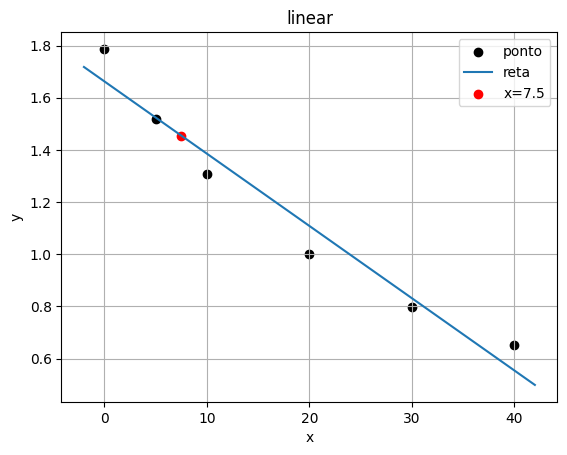

Resultado: 1.4546 



Ajuste de parábola: y = 0.00x^2 + -0.05x + 1.77


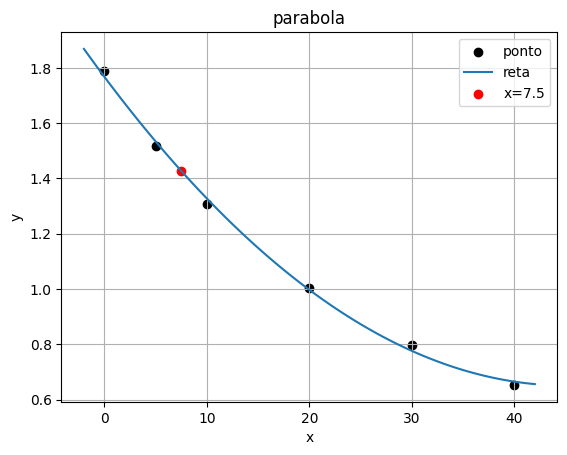

Resultado: 1.4269 



ERRO! Não foi possível continuar
O logaritmo de zero é indefinido.
Resultado: Indefinido 





In [ ]:
u = 7.5
n = 6
x = np.array([0.0, 5.0, 10.0, 20.0, 30.0, 40.0])
y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529])

print(f"Resultado: {mmq(x, y, n, u, 'linear'):.4f} \n\n\n")
print(f"Resultado: {mmq(x, y, n, u, 'parabola'):.4f} \n\n\n")
print(f"Resultado: {mmq(x, y, n, u, 'potencia')} \n\n\n")

Os resultados obtidos indicam que não foi viável realizar a aproximação para a equação de potência devido à presença de um valor zero no conjunto de dados. Isso ocorre durante a linearização da equação de potência, onde a expressão resultante assume o formato  log(y) = log(b) + a log(x). Portanto, não é possível aplicar o logaritmo nos valores de entrada, sendo que o logaritmo de zero é indefinido.

Na análise para as outras equações (ajustes linear e parábola), observa-se que o método dos mínimos quadrados resultou em valores muito próximos para T = 7,5 ºC, sendo 1.4546 (linear) e 1.4269 (parábola). Entretanto, ao visualizar no gráfico as curvas geradas por essas equações juntamente com os pontos experimentais, destaca-se a notável diferença de adaptação. A equação da reta, embora a mais simples, não abrangeu completamente os pontos, enquanto a equação da parábola proporcionou o ajuste mais satisfatório, capturando com mais precisão as curvaturas presentes nos dados. Assim, a equação de melhor ajuste foi a parábola, já que capturou com mais precisão a distibuição dos pontos da amostra. Assim, para T = 7,5 ºC o valor encontrado foi de 1.4269 para a viscosidade dinâmica.

No entanto, é relevante mencionar que, entre os pontos da amostra (T entre 5 e 10 graus), a incerteza persiste, uma vez que nos dados reais podem existir relações mais complexas, como oscilações, que não foram consideradas no conjunto de dados fornecido.

#Anotações Aulas

Ajuste linear: y = 1.60x + 1.50


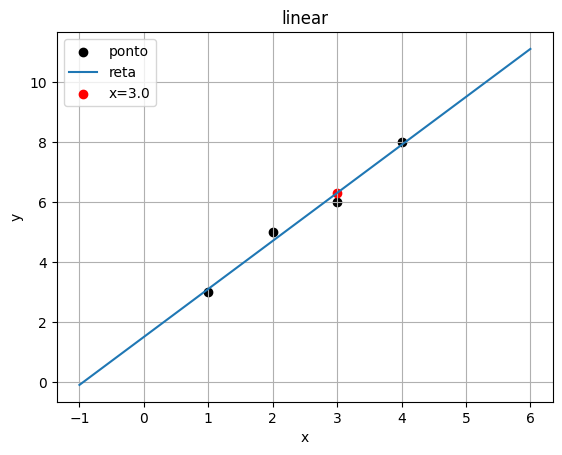

Resultado: 6.3000 


Ajuste linear: y = 1.99x + 2.96


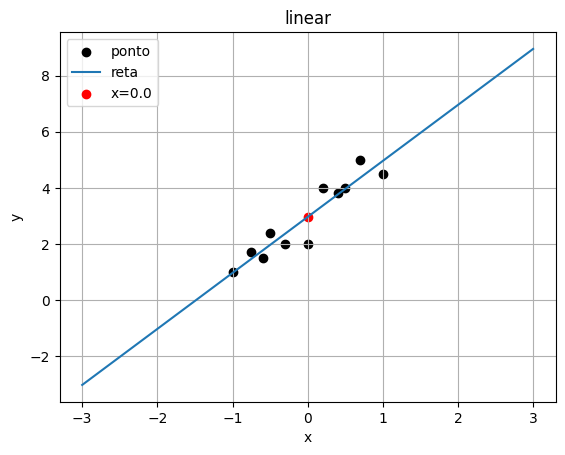

Resultado: 2.9635 


Ajuste de parábola: y = 1.86x^2 + 2.36x + 2.48


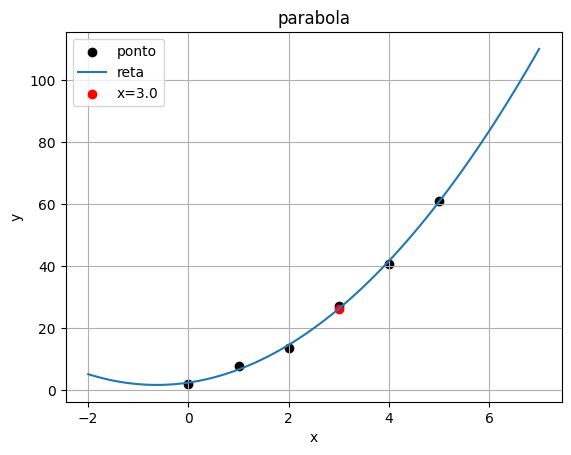

Resultado: 26.3029 


Ajuste de potência: y = 0.55 * x^1.50


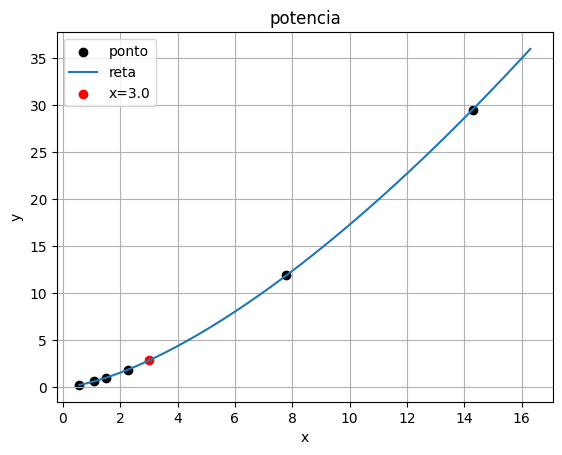

Resultado: 2.8399 




In [ ]:
n = 4
x = np.array([1.0, 2.0, 3.0, 4.0])
y = np.array([3.0, 5.0, 6.0, 8.0])
print(f"Resultado: {mmq(x, y, n, 3.0, 'linear'):.4f} \n\n")

n = 11 #https://docs.ufpr.br/~volmir/MN_13_MQM_ppt.pdf pg 15
x = np.array([-1.0, -0.75, -0.60, -0.50, -0.30, 0.0, 0.20, 0.40, 0.50, 0.70, 1.00])
y = np.array([1.0, 1.7, 1.5, 2.4, 2.0, 2.0, 4.0, 3.8, 4.0, 5.0, 4.5])
print(f"Resultado: {mmq(x, y, n, 0.0, 'linear'):.4f} \n\n")

n = 6 #https://docs.ufpr.br/~volmir/MN_13_MQM_ppt.pdf pg 22
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([2.10, 7.7, 13.60, 27.2, 40.9, 61.1])
print(f"Resultado: {mmq(x, y, n, 3.0, 'parabola'):.4f} \n\n")

n = 6 #https://www.ifi.unicamp.br/~assis/aula-lei-de-escala-04-2022.pdf pg 18
x = np.array([0.579, 1.08, 1.50, 2.28, 7.78, 14.3])
y = np.array([0.241, 0.615, 1.00, 1.88, 11.9, 29.5])
print(f"Resultado: {mmq(x, y, n, 3.0, 'potencia'):.4f} \n\n")

#mmq2(x, y, n, 'potencia')

In [ ]:
#n = 8
#x = np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
#y = np.array([0.841471, 0.891207, 0.932039, 0.963558, 0.985450, 0.997495, 0.999574, 0.991665])

#n = 8
#x = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]
#y = [1.0, 1.04881, 1.09545, 1.14018, 1.18322, 1.22474, 1.26491, 1.30384]

#n = 6
#x = [0.15, 0.20, 0.25, 0.30, 0.35, 0.40]
#y = [0.1235, 0.1654, 0.1982, 0.2248, 0.2546, 0.2781]

n = 4
x = np.array([3.0, 4.5, 7.0, 9.0])
y = np.array([2.5, 1.0, 2.5, 0.5])

eq = splineNatural(n, x, y)
eq = eval(f"lambda x: {eq[1]}")
print(eq(0.23))


Equações Spline:
S1 = 2.5 + -0.160 * (x - 3.0) + 0.840 * (x - 3.0)**2 + 0.187 * (x - 3.0)**3
S2 = 1.0 + 0.022 * (x - 4.5) + -0.767 * (x - 4.5)**2 + -0.214 * (x - 4.5)**3
S3 = 2.5 + -1.511 * (x - 7.0) + 0.000 * (x - 7.0)**2 + 0.128 * (x - 7.0)**3
3.582285061999995


In [ ]:
x = np.array([3.0, 9.0, 20.0])
y = np.array([1.5, 4.5, 6.0])
print(lagrange(3, x, y, 20.0))
print(newton(3, x, y, 20.0))

x = np.array([1.0, 2.0, 5.0])
y = np.array([12.0, 4.0, 9.0])
print(f'\n{lagrange(3, x, y, 1.0)}')
print(newton(3, x, y, 1.0))

x = np.array([3.0, 9.0, 20.0])
y = np.array([1.5, 4.5, 6.0])
print(f'\n{lagrange(3, x, y, 3.0)}')
print(newton(3, x, y, 3.0))


6.0
5.999999999999999

12.0
12.0

1.5
1.5
